# Importing Hamiltonian data

There are sample Hamiltonians stored in `symmer/tests/hamiltonian_data`

In [1]:
import os
from symmer.symplectic.base import PauliwordOp
import json

In [2]:
test_dir = os.path.join(os.path.dirname(os.getcwd()), 'tests')
ham_data_dir = os.path.join(test_dir, 'hamiltonian_data')
if not os.path.isdir(ham_data_dir):
    raise ValueError('cannot find data dir')

In [3]:
# possible json import files! 
os.listdir(ham_data_dir)

['C_STO-3G_TRIPLET_JW.json',
 'H2_6-31G_SINGLET_JW.json',
 'HCl_STO-3G_SINGLET_BK.json',
 'HeH+_6-311G_SINGLET_BK.json',
 'BeH2_STO-3G_SINGLET_JW.json',
 'NH4+_STO-3G_SINGLET_BK.json',
 'SiH4_STO-3G_SINGLET_JW.json',
 'LiOH_STO-3G_SINGLET_JW.json',
 'H2O_STO-3G_SINGLET_BK.json',
 'LiOH_STO-3G_SINGLET_BK.json',
 'OH-_STO-3G_SINGLET_BK.json',
 'Be_STO-3G_SINGLET_JW.json',
 'O2_STO-3G_TRIPLET_JW.json',
 'BeH+_STO-3G_SINGLET_BK.json',
 'H3+_3-21G_SINGLET_BK.json',
 'H3+_3-21G_SINGLET_JW.json',
 'H3+_STO-3G_SINGLET_JW.json',
 'HCN_STO-3G_SINGLET_JW.json',
 'H4_STO-3G_SINGLET_BK.json',
 'NH2-_STO-3G_SINGLET_BK.json',
 'LiH_STO-3G_SINGLET_JW.json',
 'CH2_STO-3G_TRIPLET_JW.json',
 'H6_STO-3G_SINGLET_JW.json',
 'H2O_STO-3G_SINGLET_JW.json',
 'CH+_STO-3G_SINGLET_BK.json',
 'CH2_STO-3G_TRIPLET_BK.json',
 'BeH+_STO-3G_SINGLET_JW.json',
 'Li_STO-3G_DOUBLET_BK.json',
 'H6_STO-3G_SINGLET_BK.json',
 'NH_STO-3G_SINGLET_JW.json',
 'CH3OH_STO-3G_SINGLET_JW.json',
 'HF_3-21G_SINGLET_BK.json',
 'HeH+_3-21G

In [4]:
filename = 'H4_STO-3G_SINGLET_JW.json'

if filename not in os.listdir(ham_data_dir):
    raise ValueError('unknown file')
    
with open(os.path.join(ham_data_dir, filename), 'r') as infile:
    data_dict = json.load(infile)

In [5]:
H_op = PauliwordOp.from_dictionary(data_dict['hamiltonian'])

In [6]:
H_op.to_dictionary

{'IIIIIIII': (-1.0811399195666882+0j),
 'IIIIIIIZ': (0.013810914373994877+0j),
 'IIIIIIZI': (0.013810914373994856+0j),
 'IIIIIIZZ': (0.09424143717952153+0j),
 'IIIIIZII': (0.0375818021724733+0j),
 'IIIIIZIZ': (0.0495524866742017+0j),
 'IIIIIZZI': (0.07052407412802436+0j),
 'IIIIZIII': (0.037581802172473346+0j),
 'IIIIZIIZ': (0.07052407412802436+0j),
 'IIIIZIZI': (0.0495524866742017+0j),
 'IIIIZZII': (0.1163739477015471+0j),
 'IIIZIIII': (0.0375818021724732+0j),
 'IIIZIIIZ': (0.04186848978406607+0j),
 'IIIZIIZI': (0.10114884701928653+0j),
 'IIIZIZII': (0.053565504944958195+0j),
 'IIIZZIII': (0.05363624495664159+0j),
 'IIZIIIII': (0.037581802172473255+0j),
 'IIZIIIIZ': (0.10114884701928653+0j),
 'IIZIIIZI': (0.04186848978406607+0j),
 'IIZIIZII': (0.05363624495664159+0j),
 'IIZIZIII': (0.053565504944958195+0j),
 'IIZZIIII': (0.1163739477015471+0j),
 'IZIIIIII': (0.06458158745266915+0j),
 'IZIIIIIZ': (0.053811564684024205+0j),
 'IZIIIIZI': (0.0773759667431686+0j),
 'IZIIIZII': (0.042198608

In [9]:
data_dict['data']['hf_array']

[1, 1, 1, 1, 0, 0, 0, 0]

In [10]:
from symmer.projection import QubitTapering

In [11]:
H = PauliwordOp.from_dictionary(data_dict['hamiltonian'])

In [15]:
QT = QubitTapering(H)

In [28]:
from symmer.utils import exact_gs_energy
from symmer.symplectic import QuantumState

gs_nrg, gs_vec = exact_gs_energy(H.to_sparse_matrix)
gs_psi = QuantumState.from_array(gs_vec).cleanup(zero_threshold=1e-5)
gs_psi

 0.287+0.004j |00011011> +
-0.287-0.004j |00100111> +
 0.070+0.001j |01011010> +
-0.351-0.005j |01100110> +
 0.280+0.004j |01101001> +
 0.280+0.004j |10010110> +
-0.351-0.005j |10011001> +
 0.070+0.001j |10100101> +
-0.460-0.007j |11011000> +
 0.460+0.007j |11100100>

<AxesSubplot:xlabel='binary output', ylabel='probability amplitude'>

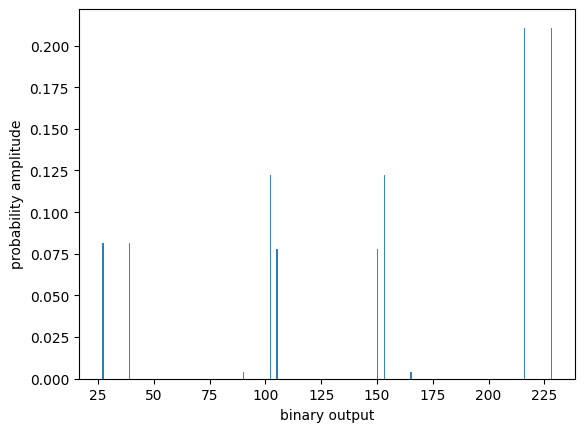

In [36]:
gs_psi.plot_state()

In [31]:
for ref in gs_psi.state_matrix:
    print(ref)
    QT.symmetry_generators.update_sector(ref)
    print(QT.symmetry_generators.coeff_vec)

[0 0 0 1 1 0 1 1]
[-1 -1  1  1]
[0 0 1 0 0 1 1 1]
[-1 -1  1  1]
[0 1 0 1 1 0 1 0]
[-1 -1  1  1]
[0 1 1 0 0 1 1 0]
[-1 -1  1  1]
[0 1 1 0 1 0 0 1]
[-1 -1  1  1]
[1 0 0 1 0 1 1 0]
[-1 -1  1  1]
[1 0 0 1 1 0 0 1]
[-1 -1  1  1]
[1 0 1 0 0 1 0 1]
[-1 -1  1  1]
[1 1 0 1 1 0 0 0]
[-1 -1  1  1]
[1 1 1 0 0 1 0 0]
[-1 -1  1  1]


In [35]:
hf_psi = QuantumState([data_dict['data']['hf_array']])
hf_psi.dagger * gs_psi

0

In [21]:
ref = [0,1,0,1,0,1,1,1]
QT.symmetry_generators.update_sector(ref)

In [41]:
QT.symmetry_generators.rotate_onto_single_qubit_paulis()

 1 IIIIXIII 
 1 IIXIIIII 
-1 IXIIIIII 
-1 XIIIIIII

In [42]:
QT.symmetry_generators.stabilizer_rotations

[( 1.000+0.000j IIIIYZII, None),
 ( 1.000+0.000j IIYZIIII, None),
 ( 1.000+0.000j IYIZIZIZ, None),
 ( 1.000+0.000j YIIZIZZI, None)]

In [37]:
QT.taper_it()

-1.314+0.000j IIII +
 0.014+0.000j IIIZ +
 0.014+0.000j IIZI +
 0.185+0.000j IIZZ +
-0.040+0.000j IZIZ +
 0.040+0.000j IZZI +
-0.117+0.000j ZIIZ +
 0.117+0.000j ZIZI +
 0.107+0.000j ZZII +
 0.065-0.000j ZZIZ +
 0.065-0.000j ZZZI +
 0.155+0.000j ZZZZ +
 0.026+0.000j IIIX +
 0.014-0.000j IIZX +
 0.068+0.000j IZZX +
-0.068+0.000j ZIZX +
-0.026+0.000j ZZIX +
-0.014+0.000j ZZZX +
-0.026+0.000j IIXI +
-0.014+0.000j IIXZ +
 0.068+0.000j IZXZ +
-0.068+0.000j ZIXZ +
 0.026+0.000j ZZXI +
 0.014+0.000j ZZXZ +
-0.047+0.000j IIYY +
 0.047+0.000j ZZYY +
-0.057+0.000j IXII +
 0.057+0.000j IXZZ +
 0.057-0.000j ZXIZ +
-0.057+0.000j ZXZI +
 0.035-0.000j IXIX +
 0.035-0.000j IYIY +
 0.035+0.000j ZXZX +
 0.035+0.000j ZYZY +
-0.035+0.000j IXXI +
 0.035-0.000j IYYI +
 0.035+0.000j ZXXZ +
-0.035+0.000j ZYYZ +
-0.021+0.000j IXXX +
-0.021+0.000j IXYY +
-0.021+0.000j IYXY +
 0.021+0.000j IYYX +
-0.019+0.000j XIII +
 0.019+0.000j XIZZ +
 0.019-0.000j XZIZ +
-0.019+0.000j XZZI +
-0.033+0.000j XIIX +
-0.033+0.000j